# Exploratory Dataset Analysis 

In [36]:
#import bookstores and dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/home/pikeblessed/proyecto_phnan/deploy-project-datascience/data/Dataset phnan.csv', delimiter=';')
df = df.drop(['ID de contenido', 'Interacció'], axis=1)
df.head(1)

,Fecha,Tipo de contenido,Cantidad de comentarios,Cantidad de me gusta,Alcance del contenido,Interacciones,Guardados único
0,01/04/2023,VIDEO,2,27,664,32,1


In [37]:
#General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Fecha                    278 non-null    object
 1   Tipo de contenido        278 non-null    object
 2   Cantidad de comentarios  278 non-null    int64 
 3   Cantidad de me gusta     278 non-null    int64 
 4   Alcance del contenido    278 non-null    int64 
 5   Interacciones            278 non-null    int64 
 6   Guardados único          278 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 15.3+ KB


In [38]:
df.dtypes

Fecha                      object
Tipo de contenido          object
Cantidad de comentarios     int64
Cantidad de me gusta        int64
Alcance del contenido       int64
Interacciones               int64
Guardados único             int64
dtype: object

In [62]:
#size dataset
df.shape

(278, 7)

In [39]:
#count none values
df.isna().sum()

Fecha                      0
Tipo de contenido          0
Cantidad de comentarios    0
Cantidad de me gusta       0
Alcance del contenido      0
Interacciones              0
Guardados único            0
dtype: int64

In [40]:
#describe int features
df.describe().round()

,Cantidad de comentarios,Cantidad de me gusta,Alcance del contenido,Interacciones,Guardados único
count,278.0,278.0,278.0,278.0,278.0
mean,15.0,536.0,9021.0,980.0,321.0
std,62.0,1767.0,30341.0,3214.0,1214.0
min,0.0,11.0,188.0,14.0,0.0
25%,2.0,62.0,1108.0,103.0,19.0
50%,6.0,172.0,2796.0,256.0,47.0
75%,13.0,324.0,5432.0,527.0,114.0
max,934.0,23361.0,308927.0,31609.0,14442.0


In [41]:
#describe object feature
df.describe(include='object')

,Fecha,Tipo de contenido
count,278,278
unique,270,3
top,24/01/2024,VIDEO
freq,3,169


In [42]:
#count duplicated values
df.duplicated().sum()

0

Text(0.5, 1.0, 'Correlation Matrix')

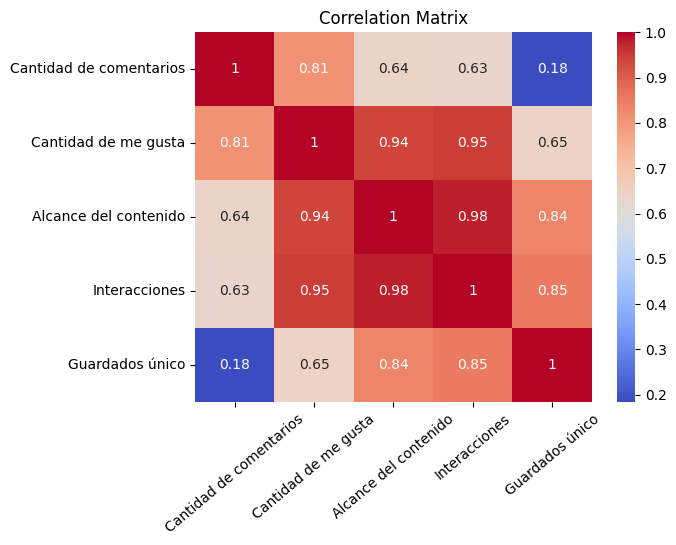

In [55]:
#correlation matrix
int_cols = df.select_dtypes(exclude='object')
correlation_matrix = int_cols.corr()
sns.heatmap(data=correlation_matrix, cmap='coolwarm', annot=True)
plt.xticks(rotation=40)
plt.title("Correlation Matrix")

<Figure size 1000x500 with 0 Axes>

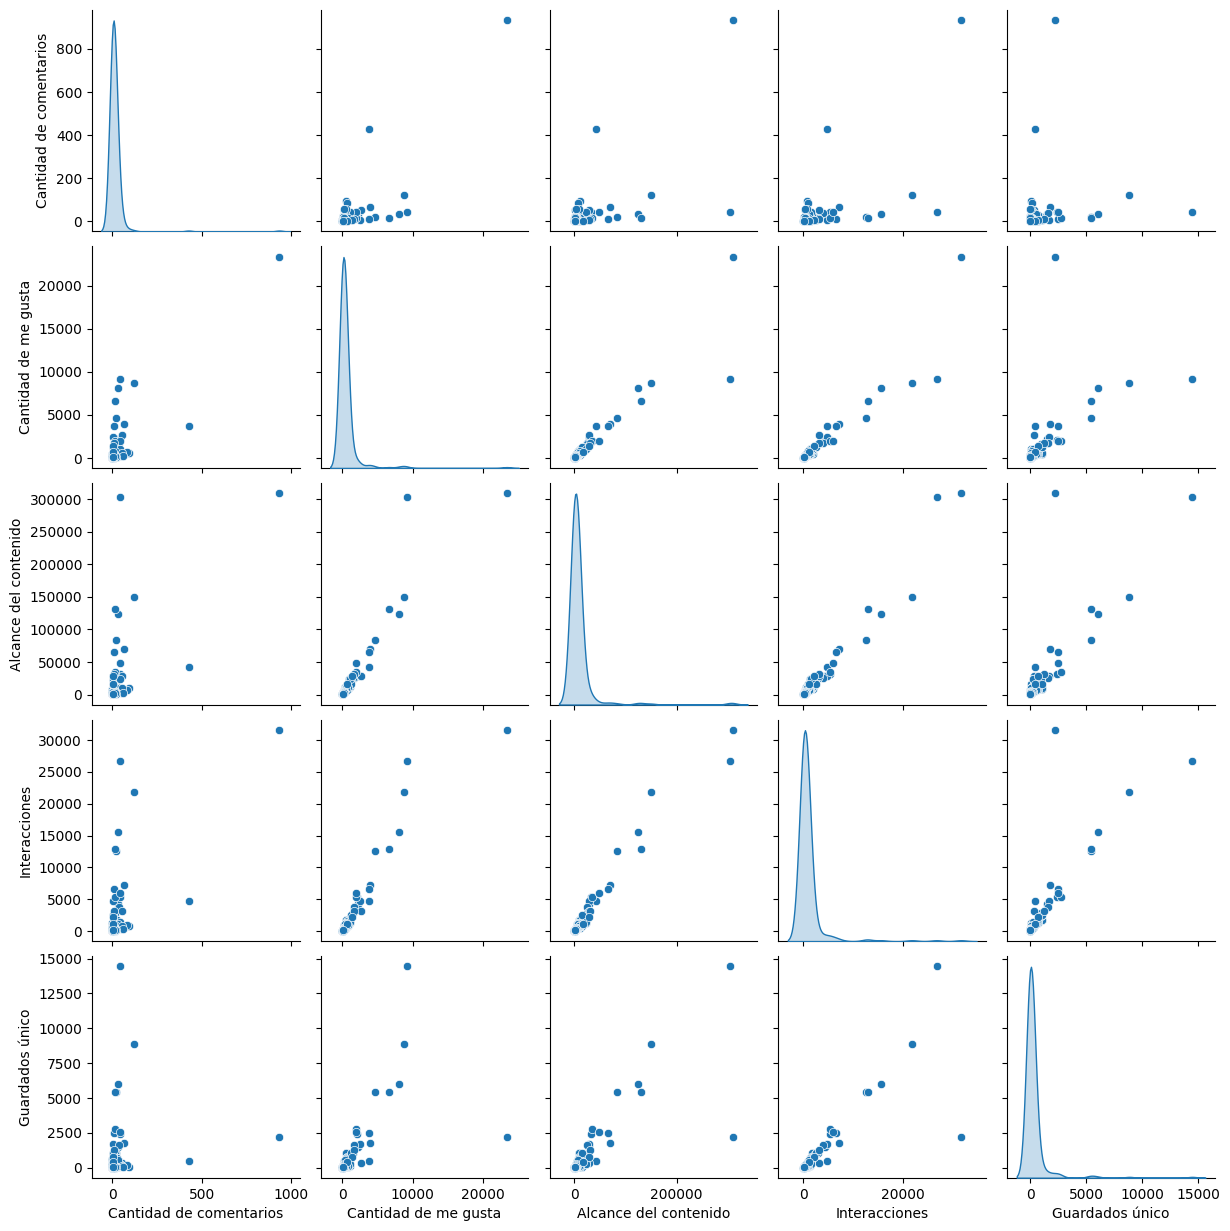

In [61]:
#relationship features
plt.figure(figsize=(10,5))
sns.pairplot(data=int_cols, diag_kind='kde');

<Axes: >

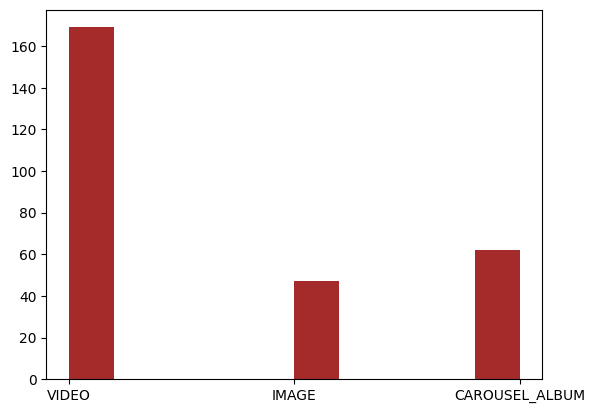

In [67]:
#distribution for type/format content
df['Tipo de contenido'].hist(grid=False, color='brown')

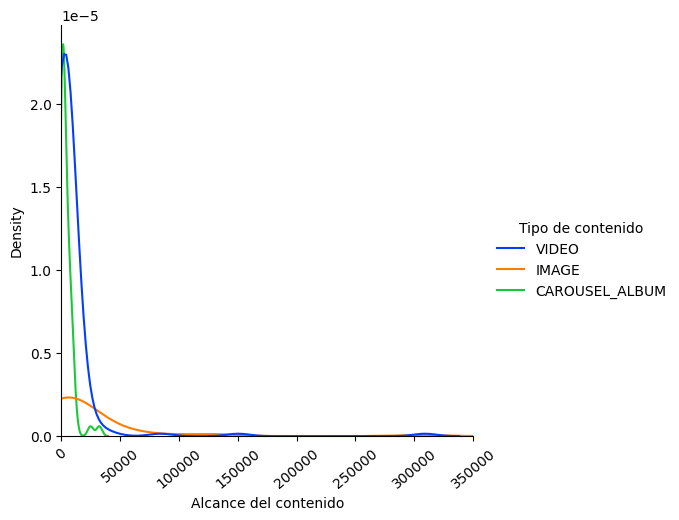

In [97]:
#density of reach content for type content
sns.displot(data=df, x='Alcance del contenido', hue='Tipo de contenido', palette='bright', kind='kde')
plt.xticks(rotation=40)
plt.xlim(0, 350000);